In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [253]:
def cost_function(X, y, m, w, b):
    h = np.dot(w, X.T) + b
    cost = (1 / m) * np.sum(np.square((h - y)))
    return cost

def gradient_descent(X, y, m, w, b):
    h = np.dot(w, X.T) + b
    dw = (1 / m) * np.sum(np.dot((h - y), X))
    db = (1 / m) * np.sum(h - y)
    return dw, db;

def feature_scaling(X, X_min, X_max):
    X = (X - X_min) / (X_max - X_min)
    return X

def predict(X_predict, X, w, b):
    y = b + w[0, 0] * X_predict + w[0, 1] * np.power(X_predict, 2) + w[0, 2] * np.power(X_predict, 3)
    return y

In [254]:
df = pd.read_csv("data/monthly_csv.csv")
df.head

<bound method NDFrame.head of         Date     Price
0    1950-01    34.730
1    1950-02    34.730
2    1950-03    34.730
3    1950-04    34.730
4    1950-05    34.730
..       ...       ...
842  2020-03  1593.764
843  2020-04  1680.030
844  2020-05  1715.697
845  2020-06  1734.032
846  2020-07  1840.807

[847 rows x 2 columns]>

In [255]:
# Load data into variables
array = df.to_numpy()

y = df.iloc[:, 1].to_numpy()
X = df.iloc[:, 0].str.replace("-", "").astype(int).to_numpy()

X_min = np.amin(X)
X_max = np.amax(X)

X = feature_scaling(X, X_min, X_max)
print(X[1:5])
print(y[1:5])


m = X.size

[0.00014273 0.00028547 0.0004282  0.00057094]
[34.73 34.73 34.73 34.73]


In [256]:
# Add polynomial features
X = X[None]

X2 = np.power(X, 2)
X3 = np.power(X, 3)

X2_min = np.amin(X2)
X2_max = np.amax(X2)

X3_min = np.amin(X3)
X3_max = np.amax(X3)

X2 = feature_scaling(X2, X2_min, X2_max)
X3 = feature_scaling(X3, X3_min, X3_max)

X = np.append(X, X2, axis=0)
X = np.append(X, X3, axis=0)

X = X.T

print(X.shape)
print(X2.shape)


(847, 3)
(1, 847)


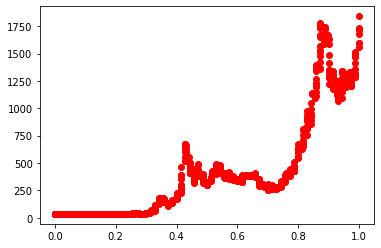

In [257]:
plt.scatter(X[:, 0].T, y, color="red")

In [258]:
# Model
w = np.random.rand(3)[None]
b = 0

iterations = 1000
learning_rate = 0.05

for i in range(iterations):
    cost = cost_function(X, y, m, w, b)
    print("Cost: " + str(cost))
    dw, db = gradient_descent(X, y, m, w, b)
    w = w - learning_rate * dw
    b = b - learning_rate * db

Cost: 378547.043225598
Cost: 302753.93834337406
Cost: 245341.1924022525
Cost: 201809.50394807124
Cost: 168762.13991698576
Cost: 143634.71417686966
Cost: 124491.19386509081
Cost: 109869.90191698549
Cost: 98667.26234390314
Cost: 90050.03798560974
Cost: 83389.0775891358
Cost: 78209.30054876347
Cost: 74151.93966135227
Cost: 70946.03761280501
Cost: 68386.92922408259
Cost: 66319.99733672242
Cost: 64628.40983706714
Cost: 63223.86209420154
Cost: 62039.58822458564
Cost: 61025.08512461562
Cost: 60142.12949536331
Cost: 59361.77096549342
Cost: 58662.06208507058
Cost: 58026.34459453882
Cost: 57441.955634857935
Cost: 56899.25097849454
Cost: 56390.86758539284
Cost: 55911.16683028706
Cost: 55455.81412294048
Cost: 55021.46149493101
Cost: 54605.507918942756
Cost: 54205.91831102178
Cost: 53821.086835011774
Cost: 53449.73365288953
Cost: 53090.826925413065
Cost: 52743.52387608762
Cost: 52407.126247766595
Cost: 52081.04662588847
Cost: 51764.78296648885
Cost: 51457.89931947533
Cost: 51160.01123012117
Cost: 5

Cost: 40897.45257750236
Cost: 40897.45257745831
Cost: 40897.45257741549
Cost: 40897.45257737388
Cost: 40897.45257733345
Cost: 40897.45257729414
Cost: 40897.452577255935
Cost: 40897.45257721883
Cost: 40897.45257718274
Cost: 40897.45257714767
Cost: 40897.45257711358
Cost: 40897.45257708047
Cost: 40897.452577048265
Cost: 40897.45257701697
Cost: 40897.452576986565
Cost: 40897.45257695701
Cost: 40897.45257692828
Cost: 40897.45257690037
Cost: 40897.45257687322
Cost: 40897.45257684686
Cost: 40897.45257682123
Cost: 40897.45257679631
Cost: 40897.452576772106
Cost: 40897.452576748576
Cost: 40897.4525767257
Cost: 40897.45257670348
Cost: 40897.45257668187
Cost: 40897.45257666088
Cost: 40897.45257664048
Cost: 40897.45257662065
Cost: 40897.452576601376
Cost: 40897.45257658264
Cost: 40897.45257656443
Cost: 40897.45257654673
Cost: 40897.45257652953
Cost: 40897.45257651282
Cost: 40897.45257649659
Cost: 40897.4525764808
Cost: 40897.45257646544
Cost: 40897.45257645054
Cost: 40897.45257643604
Cost: 40897.

In [259]:
print("w: " + str(w))
print("b: " + str(b))
print(w[0, 0])
print(X.shape)
print(X2.shape)
print(X3.shape)

w: [[470.65872225 471.18428851 471.1650224 ]]
b: -91.44442665419923
470.6587222510335
(847, 3)
(1, 847)
(1, 847)


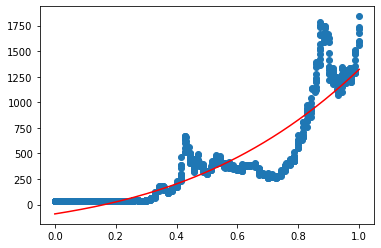

In [260]:
plt.plot(X[:, 0], (b + w[0, 0] * X[:, 0] + w[0, 1] * X2 + w[0, 2] * X3).T, "-r")
plt.scatter(X[:, 0].T, y)
plt.show()

In [262]:
# Prediction
X_predict = feature_scaling(202509, X_min, X_max)
y = predict(X_predict, X, w, b)
print("Predicted price for 2021-08: " + str(y))

Predicted price for 2021-08: 1533.9415689499938
